# **📘 [LDATS2350] - DATA MINING**

## **📊 Python21 - K-Nearest Neighbors Regression (KNN Regressor)**

**Prof. Robin Van Oirbeek**  

<br/>

**🧑‍🏫 Guillaume Deside** *(guillaume.deside@uclouvain.be)*  

---

## **🔹 What is K-Nearest Neighbors Regression?**
K-Nearest Neighbors Regression (**KNN Regressor**) is a **non-parametric regression technique** that predicts a target value based on the **average of the k nearest neighbors**.

🔹 **Key Idea:**
- Instead of fitting a function, KNN **stores** training instances.
- When predicting, KNN looks at the **k nearest data points** and takes their **average**.
- The choice of **k** determines the **bias-variance tradeoff**.

✅ **Advantages:**
- Simple and **easy to understand**.
- Works well for **non-linear relationships**.
- No need for **assumptions** about data distribution.

🚫 **Disadvantages:**
- Sensitive to **outliers**.
- **Computationally expensive** for large datasets.
- Requires careful **feature scaling**.

---

## **🔹 How KNN Regression Works**
1️⃣ **Choose the number of neighbors** (k).  
2️⃣ **Measure distance** between new input and training points.  
3️⃣ **Select the k closest points** (nearest neighbors).  
4️⃣ **Compute the average (or weighted average) of the k nearest neighbors**.  

📌 **Distance Metrics Used:**
- **Euclidean Distance** (Most common):  
  \[
  d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  \]
- **Manhattan Distance**:  
  \[
  d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
  \]
- **Minkowski Distance**: Generalized form of Euclidean & Manhattan distance.

📌 **Choosing k:**
- **Small k** → More variance (risk of overfitting).  
- **Large k** → More bias (smoother predictions, risk of underfitting).  
- **Common choice**: \( k \approx \sqrt{N} \) (where N = number of samples).

---

## **🔹 Performance Metrics for KNN Regression**
To evaluate a **regression model**, we use:

### **📌 1️⃣ Mean Absolute Error (MAE)**
\[
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\]
- Measures the average absolute difference between actual and predicted values.
- **Lower MAE** = **Better model performance**.

### **📌 2️⃣ Mean Squared Error (MSE)**
\[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]
- Squares the errors, penalizing larger mistakes.
- Sensitive to outliers.

### **📌 3️⃣ Root Mean Squared Error (RMSE)**
\[
RMSE = \sqrt{MSE}
\]
- Same unit as Y, making it more interpretable.

### **📌 4️⃣ R² Score (Coefficient of Determination)**
\[
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
\]
- Measures how much variance in Y is explained by X.
- **\( R^2 \) close to 1** = Model fits well.

---



---

## **🔹 When to Use KNN Regression?**
✅ Works well when:
- Data is **non-linear**.
- There are **small to medium-sized datasets**.
- There are **fewer irrelevant features** (KNN is sensitive to irrelevant features).

🚫 Avoid when:
- There are **too many dimensions** (curse of dimensionality).
- The dataset is **very large** (computational cost increases).
- **Feature scaling** is not performed (KNN is distance-based).

---



# Data loading

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [6]:
from keras.datasets import boston_housing

# Load the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data=train_data[train_targets<50]
train_targets=train_targets[train_targets<50]

test_data=test_data[test_targets<50]
test_targets=test_targets[test_targets<50]

# Print the shape of the training and test datasets
print("Training data shape:", train_data.shape)
print("Training targets shape:", train_targets.shape)
print("Test data shape:", test_data.shape)
print("Test targets shape:", test_targets.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(train_data)
train_data=scaler.transform(train_data)
test_data = scaler.transform(test_data)

Training data shape: (391, 13)
Training targets shape: (391,)
Test data shape: (99, 13)
Test targets shape: (99,)


### 🧪 **Exercise – K-Nearest Neighbors Regression with GridSearchCV**

**Objective:**  
You will use the K-Nearest Neighbors (KNN) algorithm to build a regression model. You will apply grid search to find the best hyperparameters, evaluate model performance using several regression metrics, and visualize the results.

---

### ✅ Instructions

1. **Preprocess the Data**
   - Split the data into training and test sets.
   - Apply `StandardScaler` to normalize the feature values.

2. **Define and Train a KNN Regressor**
   - Use `KNeighborsRegressor()` from `sklearn.neighbors`.
   - Create a hyperparameter grid with:
     - `n_neighbors`: from 2 to 19
     - `p`: [1, 2, 3] (Minkowski power parameter)

3. **Grid Search Cross-Validation**
   - Use `GridSearchCV()` with:
     - 3-fold cross-validation
     - Scoring metric: `'neg_mean_absolute_error'`
   - Fit the model on the training data.

4. **Print and Interpret the Grid Search Results**
   - Display the best parameters and scores.
   - Plot the cross-validation mean test scores across different `n_neighbors`.

5. **Evaluate the Model**
   - Use the **best estimator** to make predictions on both training and test sets.
   - Calculate the following metrics:
     - MAE (Mean Absolute Error)
     - MSE (Mean Squared Error)
     - RMSE (Root Mean Squared Error)
     - R² Score

6. **Plot the Residuals**
   - Create a scatter plot of predicted values vs. residuals for both training and test sets.
   - Add a horizontal line at `y=0` to visualize the error distribution.
   - Save all plots in a folder named `figures/knn_regressor/`.

---

### ✍️ Bonus (Optional)
- Use `SHAP` or `LIME` to interpret the model output.
- Try other scoring metrics in `GridSearchCV` (e.g., `'r2'`, `'neg_mean_squared_error'`).
- Add `weights=['uniform', 'distance']` to the hyperparameter grid.

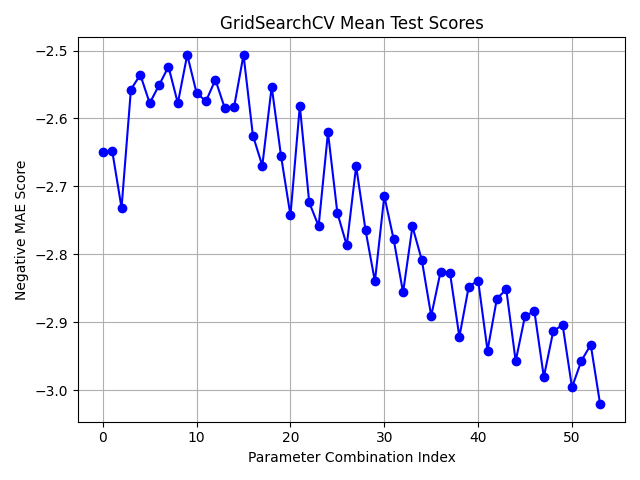

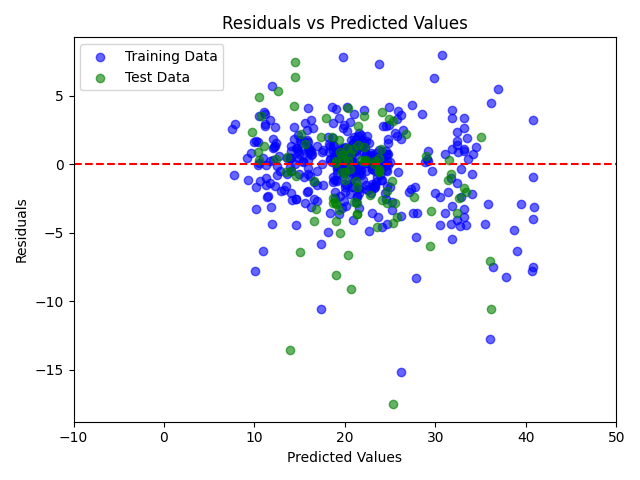
